# Import Libraries

In [13]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
from keras.layers import *
from keras.models import Sequential
from keras.preprocessing import image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os 
import warnings
warnings.filterwarnings('ignore')

In [14]:
#Read Dataset ----> train , test
train_path = '/kaggle/input/covid19-image-dataset/Covid19-dataset/train' 
test_path = '/kaggle/input/covid19-image-dataset/Covid19-dataset/test'


In [15]:
#image classes
image_classes = os.listdir('/kaggle/input/covid19-image-dataset/Covid19-dataset/train')
print(image_classes)

['Normal', 'Viral Pneumonia', 'Covid']


In [16]:
def plot_image(image_classes):
    plt.figure(figsize=(12 , 12))
    
    for i , category in enumerate(image_classes):
        image_path = train_path + '/' + category
        images_in_folder = os.listdir(image_path)
        
        first_image = images_in_folder[0]
        first_image_path = image_path + '/' + first_image 
        
        img= image.load_img(first_image_path)
        img_array = image.img_to_array(img) / 255
        
        plt.subplot(1 , 3 , i+1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')
    plt.show()

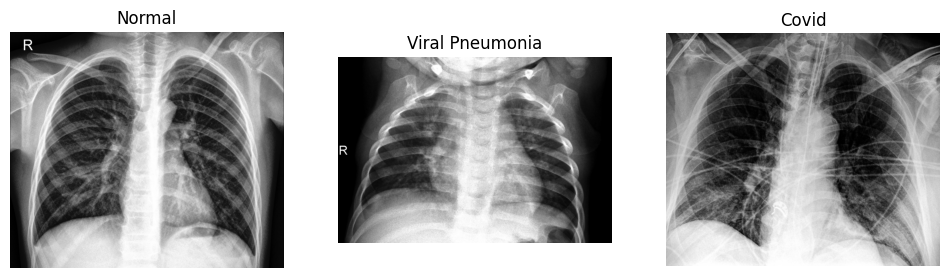

In [17]:
plot_image(image_classes)

In [18]:
#image preproccesing
#model
#compile
#fit
#visualization
#Save

In [19]:
#image preproccesing
data_generator = ImageDataGenerator(rescale = 1/255)

In [20]:
#Train Data Generator
train_data = data_generator.flow_from_directory(train_path , 
                                               target_size = (224 , 224),
                                               batch_size = 16 
                                               )

Found 251 images belonging to 3 classes.


In [21]:
#Test Data Generator
test_data = data_generator.flow_from_directory(test_path ,
                                              target_size = (224, 224),
                                              batch_size = 1
                                              )

Found 66 images belonging to 3 classes.


In [24]:
#CNN Model
model = Sequential()

#add Conv layer with filters , kernel (size) , padding (pixel by pixel) ,input shape
model.add(Conv2D(filters=32 , kernel_size = 3 , padding ='same' ,
                 activation = 'relu' , input_shape = [224 , 224 , 3]))
#add pooling layer 
model.add(MaxPooling2D(pool_size =(2,2)))

#add Conv layer with filters , kernel (size) , padding (pixel by pixel) ,input shape
model.add(Conv2D(filters=64 , kernel_size = 3 , padding ='same' ,
                 activation = 'relu' , ))
#add pooling layer 
model.add(MaxPooling2D())

#add Conv layer with filters , kernel (size) , padding (pixel by pixel) ,input shape
model.add(Conv2D(filters=128 , kernel_size = 3 , padding ='same' ,
                 activation = 'relu' , ))
#add pooling layer 
model.add(MaxPooling2D())
          
#add flatten layer -----> 1D
model.add(Flatten())

#add Fully Connected Layer
model.add(Dense(128 , activation = 'relu'))
model.add(Dense(128 , activation = 'relu'))

#add output layer 
model.add(Dense(3 , activation = 'softmax'))

In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,955,331 (49.42 MB)

 Trainable params: 12,955,331 (49.42 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
#Compile Model 
model.compile(optimizer='adam',
             loss = 'categorical_crossentropy',
             metrics=['accuracy'])

In [27]:
#fit Model
model_history = model.fit(train_data, epochs = 5 , validation_data = test_data)

Epoch 1/5


I0000 00:00:1732018428.928139    1770 service.cc:145] XLA service 0x7c1498002840 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732018428.928195    1770 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 1/16 ━━━━━━━━━━━━━━━━━━━━ 2:27 10s/step - accuracy: 0.0000e+00 - loss: 1.1062

I0000 00:00:1732018432.899748    1770 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 581ms/step - accuracy: 0.4063 - loss: 1.3326 - val_accuracy: 0.6364 - val_loss: 0.6314
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 199ms/step - accuracy: 0.8554 - loss: 0.4238 - val_accuracy: 0.8182 - val_loss: 0.3599
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 211ms/step - accuracy: 0.9340 - loss: 0.1671 - val_accuracy: 0.8030 - val_loss: 0.4053
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 204ms/step - accuracy: 0.9431 - loss: 0.1496 - val_accuracy: 0.9394 - val_loss: 0.1834
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 224ms/step - accuracy: 0.9734 - loss: 0.0596 - val_accuracy: 0.8939 - val_loss: 0.2332


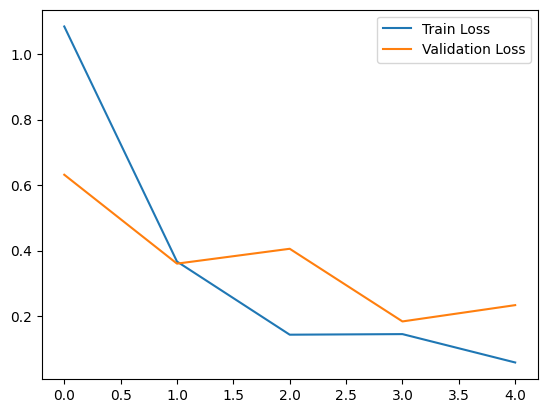

In [30]:
plt.plot(model_history.history['loss'], label='Train Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


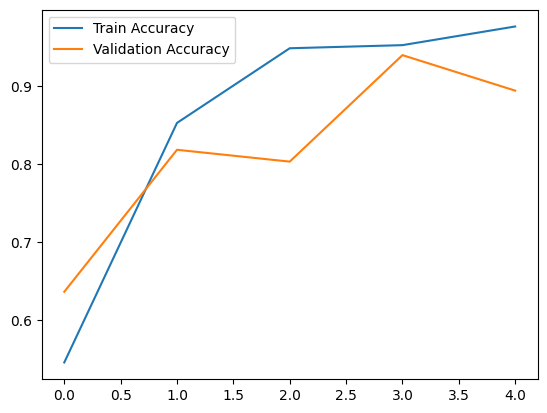

In [31]:
plt.plot(model_history.history['accuracy'], label='Train Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


In [32]:
model.evaluate(test_data)

66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9204 - loss: 0.1670


[0.23317353427410126, 0.8939393758773804]

In [33]:
model.evaluate(train_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 290ms/step - accuracy: 0.9969 - loss: 0.0208


[0.02160920388996601, 0.9960159659385681]

In [34]:
#Save model 
model.save('Covid19_Model.h5')

In [36]:
class_map = dict([value, key] for key , value in train_data.class_indices.items())


In [37]:
class_map

{0: 'Covid', 1: 'Normal', 2: 'Viral Pneumonia'}

In [48]:
import numpy as np 
def prediction(test_image , actual_label):
    #Load & Preprocessing image 
    testing_image = image.load_img(test_image , target_size = (224 , 224))
    test_img_array = image.img_to_array(testing_image) / 255
    
    test_img_input = test_img_array.reshape(1 , test_img_array.shape[0],
                                             test_img_array.shape[1],
                                              test_img_array.shape[2])
    #make prediction
    predicted_class = np.argmax(model.predict(test_img_input))
    predicted_label = class_map[predicted_class]
    
    plt.figure(figsize = (4 , 4))
    plt.imshow(test_img_array)
    plt.title('Actual Label:{} , Predicted_Label:{}'.format(actual_label , predicted_label))
    
    plt.grid()
    plt.axis('off')
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


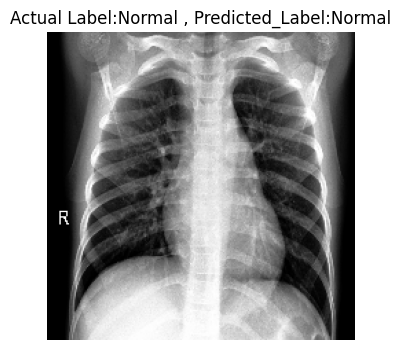

In [52]:
test_image = '/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal/0103.jpeg'
prediction(test_image , actual_label = 'Normal')